This notebook file aims to explore how holidays affect store sales.

In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
#for correlation between isholiday bool and sales float:
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Data Science/Project1: Math 3439/data/'
df_sales = pd.read_csv(data_path+'sales.csv')

Initially looked at all 3 available csvs, but only sales.csv is needed to determine how holidays affect sales.

In [ ]:
df_sales.head()

Sales is reported weekly. It's also separated by department, which we aren't focusing on. Let's drop dept and aggregate sales by store for each reported date. We'll see how many entries there are after, and check for NA values.

In [ ]:
print(f"Entries before drop: {df_sales.shape[0]}")
df_sales.drop('Dept', axis=1, inplace=True)
df_sales = df_sales.groupby(['Store', 'Date', 'IsHoliday']).agg({'Weekly_Sales': np.sum}).reset_index()
print(f"Entries after drop: {df_sales.shape[0]}")
print("NA values:")
df_sales.isna().sum()

No NA values. Let's calculate adjusted weekly sales per store per date. This will help to show how well a store is doing when compared to the average amount stores are earning for that date. 

In [ ]:
weekly_sales_mean_df = df_sales.groupby('Date').agg({'Weekly_Sales': 'mean'}).reset_index()
weekly_sales_mean_df.columns = ['Date', 'Sales Avg For Date']
df_sales = pd.merge(df_sales, weekly_sales_mean_df, on='Date')
df_sales['adjusted_weekly_sales'] = df_sales['Weekly_Sales'] - df_sales['Sales Avg For Date']
df_sales.head()

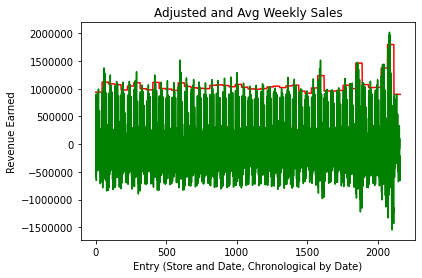

In [19]:
#plt.plot(df_sales_avg_merge['Weekly_Sales'], color='blue')
plt.plot(df_sales['Sales Avg For Date'], color='red')
plt.ylabel('Revenue Earned')
plt.xlabel('Entry (Store and Date, Chronological by Date)')
#plt.title('Total and Avg Weekly Sales')

plt.plot(df_sales['adjusted_weekly_sales'], color='green')
plt.title('Adjusted and Avg Weekly Sales')

plt.ticklabel_format(axis='y', style='plain')

Let's print some basic stats, then show this information using a boxplot.

In [ ]:
print("   Basic Stats of Weekly Sales:\n")
#how many sales entries were for weeks with holidays?
df_sales_holidays = df_sales[df_sales['IsHoliday'] == True]
print(f"Entries for holidays: {df_sales_holidays.shape[0]} ({round((df_sales_holidays.shape[0] / df_sales.shape[0] * 100), 2)}% of entries)")
#how many entries for weeks without a holiday?
df_sales_not_holidays = df_sales[df_sales['IsHoliday'] == False]
print(f"Entries for non-holidays: {df_sales_not_holidays.shape[0]} ({round((df_sales_not_holidays.shape[0] / df_sales.shape[0] * 100), )}% of entries)")
#
total_sales = df_sales['Weekly_Sales'].sum()
total_sales_holiday = df_sales_holidays['Weekly_Sales'].sum()
total_sales_not_holiday = df_sales_not_holidays['Weekly_Sales'].sum()
print(f'Total sales for holidays: ${total_sales_holiday.round(2)}')
print(f'Total sales for non-holidays: ${total_sales_not_holiday.round(2)}')
print(f'Difference in sales: ${total_sales_not_holiday.round(2) - total_sales_holiday.round(2)}')
#
print(f"Mean weekly sales for holidays: ${df_sales_holidays['Weekly_Sales'].mean().round(2)}")
print(f"Mean weekly sales for non-holidays: ${df_sales_not_holidays['Weekly_Sales'].mean().round(2)}")
print(f"Max weekly sales for holidays: ${df_sales_holidays['Weekly_Sales'].max()}")
print(f"Max weekly sales for non-holidays: ${df_sales_not_holidays['Weekly_Sales'].max()}")
print(f"Min weekly sales for holidays: ${df_sales_holidays['Weekly_Sales'].min().round(2)}")
print(f"Min weekly sales for non-holidays: ${df_sales_not_holidays['Weekly_Sales'].min()}")

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


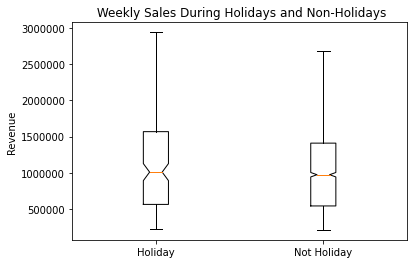

<Figure size 2880x1440 with 0 Axes>

In [12]:
plt.boxplot([df_sales_holidays['Weekly_Sales'], df_sales_not_holidays['Weekly_Sales']], notch=True, showfliers=False)
plt.xticks([1, 2], ['Holiday', 'Not Holiday'])
plt.ylabel('Revenue')
plt.title(' Weekly Sales During Holidays and Non-Holidays')
plt.ticklabel_format(axis='y', style='plain')
plt.figure(figsize=[40, 20])
plt.savefig(data_path+'holidays_box.png')
plt.show()
plt.close()
#adjusted sales wasn't originally run but could be helpful:
#plt.boxplot([df_sales_holidays['adjusted_weekly_sales'], df_sales_not_holidays['adjusted_weekly_sales']], notch=True, showfliers=False)

How strong is the correlation between holidays and sales?

In [16]:
df_sales.corr()
df_sales.corr() ** 2
stats.pointbiserialr(df_sales['IsHoliday'],df_sales['Weekly_Sales'])
stats.pointbiserialr(df_sales['IsHoliday'],df_sales['adjusted_weekly_sales'])

PointbiserialrResult(correlation=-1.734723475976807e-18, pvalue=1.000000000002891)

Correlations are weak. Weeks with holidays had a few big outliers with a lot of revenue, but overall, there's not a significant difference between sales on holidays and non-holidays.